In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from scipy.cluster.hierarchy import linkage, fcluster



In [6]:
data_1 = pd.read_csv('data/dataset1.csv')
data_1

,F0,F1,F2,F3,LABEL
0,-2.182270,8.795186,5.469284,-0.237966,0
1,3.698693,3.215945,-10.741661,10.535512,2
2,-7.254824,-7.197825,-7.556684,7.881214,1
3,-3.186120,9.625962,5.670878,2.904450,0
4,2.279499,3.920786,-9.580430,9.072586,2
...,...,...,...,...,...
995,-6.423739,-4.715107,-9.481846,8.251363,1
996,1.512494,4.195893,-12.076637,8.739949,2
997,3.123122,5.222823,-9.056304,9.759858,2
998,1.133059,5.116752,-8.712263,10.870868,2


In [7]:
data_2 = pd.read_csv('data/dataset2.csv')
data_2

,F0,F1,F2,F3,LABEL
0,-2.182270,8.795186,5.469284,-0.237966,0
1,2.860497,3.688698,-10.164985,9.966854,2
2,-7.817618,-7.674397,-5.634218,8.717751,1
3,-3.186120,9.625962,5.670878,2.904450,0
4,2.150900,4.041119,-9.584370,9.235392,2
...,...,...,...,...,...
995,-5.739908,-1.467604,-10.447123,9.643123,1
996,1.767397,4.178672,-10.832474,9.069073,2
997,2.572711,4.692137,-9.322307,9.579028,2
998,1.577680,4.639102,-9.150287,10.134532,2


In [8]:
data_3 = pd.read_csv('data/dataset3.csv')
data_3

,F0,F1,F2,F3,LABEL
0,-1.499212,5.202552,-1.499212,5.202552,0
1,-10.027096,16.292373,-10.027096,16.292373,2
2,-8.609967,9.453919,-8.609967,9.453919,1
3,-3.611808,9.100601,-3.611808,9.100601,0
4,-9.950580,16.051347,-9.950580,16.051347,2
...,...,...,...,...,...
995,-13.190091,17.275747,-13.190091,17.275747,1
996,-10.931399,17.065624,-10.931399,17.065624,2
997,-9.941240,16.463917,-9.941240,16.463917,2
998,-10.647363,17.416278,-10.647363,17.416278,2


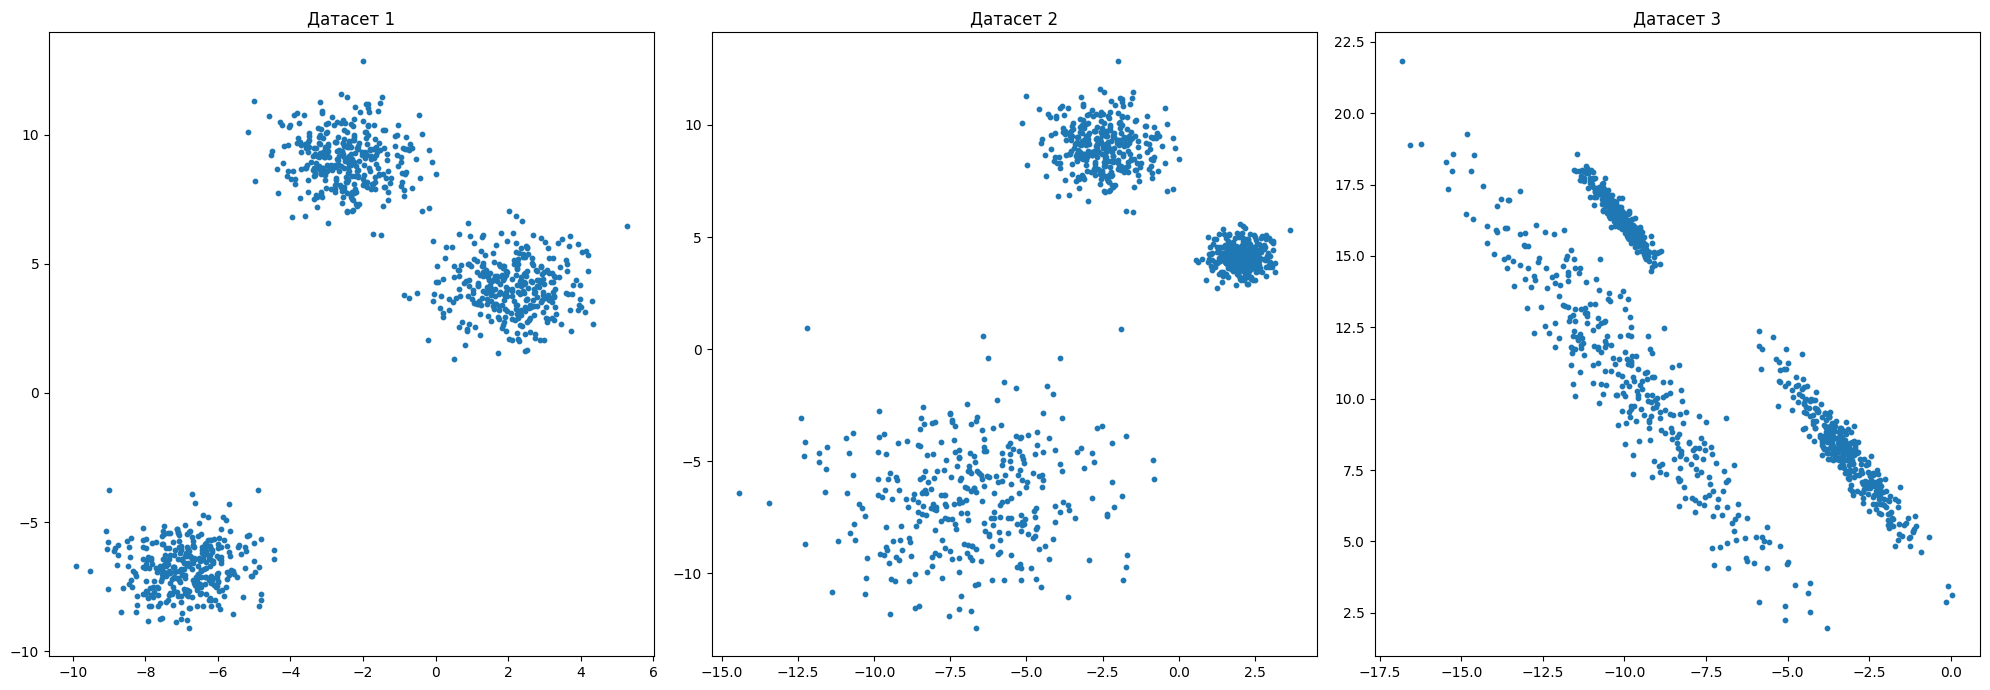

In [20]:
# Посмотрим на форму кластеров трех датасетов
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

axes[0].scatter(data_1.iloc[:, 0], data_1.iloc[:, 1], s=10)
axes[0].set_title("Датасет 1")

axes[1].scatter(data_2.iloc[:, 0], data_2.iloc[:, 1], s=10)
axes[1].set_title("Датасет 2")

axes[2].scatter(data_3.iloc[:, 0], data_3.iloc[:, 1], s=10)
axes[2].set_title("Датасет 3")

plt.tight_layout()
plt.show()

In [25]:
data_2[data_2['LABEL'] == 0].describe()


,F0,F1,F2,F3,LABEL
count,334.000000,334.000000,334.000000,334.000000,334.0
mean,-2.479722,9.036261,4.681010,2.024284,0.0
std,0.940247,1.035264,0.971434,0.988385,0.0
min,-5.160167,6.118031,1.398611,-0.328751,0.0
25%,-3.143980,8.333508,4.059425,1.312662,0.0
50%,-2.460507,9.045361,4.680786,2.020911,0.0
75%,-1.883917,9.673732,5.277267,2.718676,0.0
max,0.017735,12.867018,7.718760,4.693339,0.0


In [26]:
data_2[data_2['LABEL'] == 1].describe()

,F0,F1,F2,F3,LABEL
count,333.000000,333.000000,333.000000,333.000000,333.0
mean,-6.889797,-6.541549,-8.874557,7.302611,1.0
std,2.344854,2.362250,2.587299,2.566851,0.0
min,-14.428408,-12.428361,-15.596408,-0.027449,1.0
25%,-8.396378,-8.211862,-10.609345,5.599203,1.0
50%,-6.840581,-6.521638,-8.906589,7.209995,1.0
75%,-5.239875,-4.814992,-7.097359,8.944224,1.0
max,-0.812836,0.964262,-1.465592,15.306292,1.0


In [27]:
data_2[data_2['LABEL'] == 2].describe()

,F0,F1,F2,F3,LABEL
count,333.000000,333.000000,333.000000,333.000000,333.0
mean,2.051791,4.121401,-9.621464,9.418245,2.0
std,0.508617,0.522141,0.508739,0.502138,0.0
min,0.568806,2.745374,-11.053034,7.902629,2.0
25%,1.718187,3.781600,-9.973308,9.080418,2.0
50%,2.093825,4.092954,-9.619192,9.423796,2.0
75%,2.379605,4.452820,-9.311736,9.754358,2.0
max,3.643847,5.595653,-8.012282,11.361316,2.0


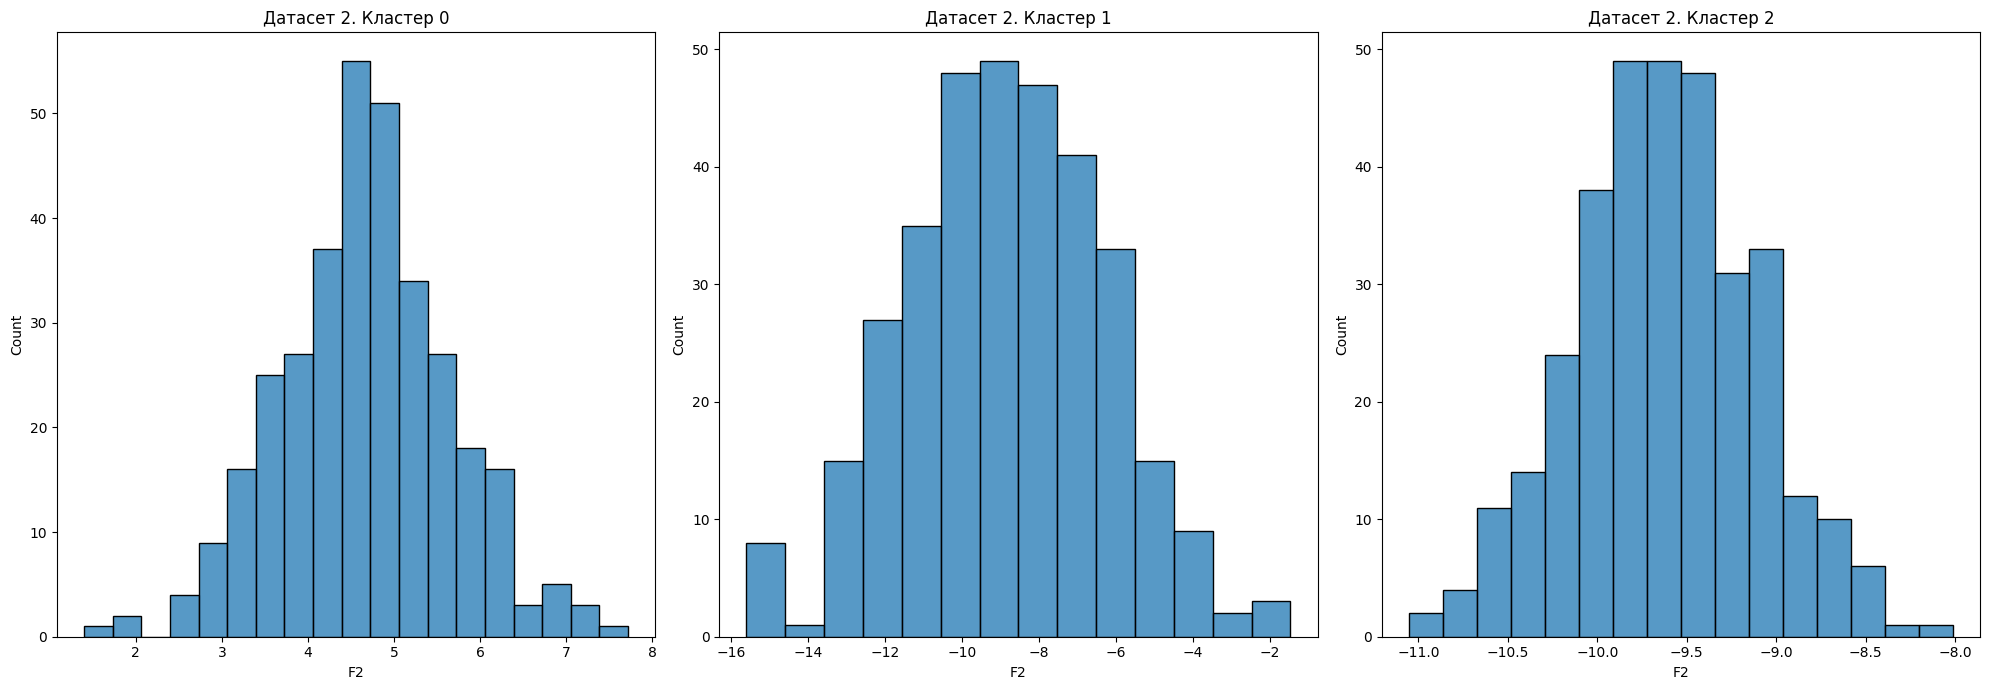

In [36]:
# Посмотрим на форму кластеров трех датасетов
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(data_2[data_2['LABEL'] == 0].iloc[:, 2], ax=axes[0])
axes[0].set_title("Датасет 2. Кластер 0")

sns.histplot(data_2[data_2['LABEL'] == 1].iloc[:, 2], ax=axes[1])
axes[1].set_title("Датасет 2. Кластер 1")

sns.histplot(data_2[data_2['LABEL'] == 2].iloc[:, 2], ax=axes[2])
axes[2].set_title("Датасет 2. Кластер 2")

plt.tight_layout()
plt.show()

In [41]:
# Кластеризация
kmeans_model = cluster.KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(data_1)

# Выделяем центры класторов
centers_data_1 = kmeans_model.cluster_centers_

# Значение 4-й координаты центра для последнего кластера 
last_cluster_center = centers_data_1[-1][3]
answer = round(last_cluster_center, 3)
answer

/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7.315

In [42]:
centers_data_1

array([[ 2.08128181e+00,  4.08135021e+00, -9.65461760e+00,
         9.43829232e+00,  2.00000000e+00],
       [-2.47972233e+00,  9.03626136e+00,  4.68100968e+00,
         2.02428364e+00,  3.33066907e-16],
       [-6.88369510e+00, -6.74468537e+00, -8.85281957e+00,
         7.31515829e+00,  1.00000000e+00]])

In [47]:
dataset2_labeled = data_2.copy()

# Кластеризация KMeans
kmeans_model_data_2 = cluster.KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans_model_data_2.fit_predict(data_2)

# Иерархическая кластеризация
linkage_matrix = linkage(data_2, method='complete')
hierarchical_labels = fcluster(linkage_matrix, t=2, criterion='maxclust')

# Добавим в датафрейм
dataset2_labeled['kmeans_2'] = kmeans_labels
dataset2_labeled['hierarchical_2'] = hierarchical_labels

/Users/nadezdaoskina/.pyenv/versions/3.10.9/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
dataset2_labeled.head()


,F0,F1,F2,F3,LABEL,kmeans_2,hierarchical_2
0,-2.182270,8.795186,5.469284,-0.237966,0,1,2
1,2.860497,3.688698,-10.164985,9.966854,2,0,2
2,-7.817618,-7.674397,-5.634218,8.717751,1,0,1
3,-3.186120,9.625962,5.670878,2.904450,0,1,2
4,2.150900,4.041119,-9.584370,9.235392,2,0,2


In [ ]:
# Все объекты из cluster_0 определены в один кластер методом кластеризации k-средних
cluster_0_kmeans_unique = dataset2_labeled[dataset2_labeled['LABEL'] == 0]['kmeans_2'].nunique()
cluster_0_kmeans_unique

1

In [54]:
dataset2_labeled[dataset2_labeled['LABEL'] == 0]['kmeans_2'].value_counts()

1    334
Name: kmeans_2, dtype: int64

In [ ]:
# Все объекты из cluster_0 определены в один кластер в ходе иерархической кластеризации
cluster_0_hierarchical_unique = dataset2_labeled[dataset2_labeled['LABEL'] == 0]['hierarchical_2'].nunique()
cluster_0_hierarchical_unique

1

In [55]:
dataset2_labeled[dataset2_labeled['LABEL'] == 0]['hierarchical_2'].value_counts()

2    334
Name: hierarchical_2, dtype: int64

In [ ]:
# Все объекты из cluster_2 определены в один кластер в ходе иерархической кластеризации
cluster_2_hier_unique = dataset2_labeled[dataset2_labeled['LABEL'] == 2]['hierarchical_2'].nunique()
cluster_2_hier_unique

1

In [57]:
dataset2_labeled[dataset2_labeled['LABEL'] == 2]['hierarchical_2'].value_counts()

2    333
Name: hierarchical_2, dtype: int64

In [63]:
# Результаты кластеризации методом K-средних и иерархической в целом совпадают
agreement_ratio = np.mean(dataset2_labeled['kmeans_2']) == np.mean(dataset2_labeled['hierarchical_2'])
agreement_ratio

False

In [61]:
np.mean(dataset2_labeled['kmeans_2'])

0.334

In [62]:
np.mean(dataset2_labeled['hierarchical_2'])

1.667

In [65]:
# Результаты двух алгоритмов отличаются: метод полной связи объединил в один кластер cluster_0 и cluster_1, 
# а метод k-средних - cluster_1 и cluster_2.
kmeans_1_and_2 = dataset2_labeled[dataset2_labeled['LABEL'].isin([1, 2])]['kmeans_2'].nunique() == 1
hierarchical_0_and_1 = dataset2_labeled[dataset2_labeled['LABEL'].isin([0, 1])]['hierarchical_2'].nunique() == 1
results = (kmeans_1_and_2 and hierarchical_0_and_1)
results

False

In [67]:
dataset2_labeled[(dataset2_labeled['LABEL'] == 0) | (dataset2_labeled['LABEL'] == 1)]['hierarchical_2'].value_counts()

2    334
1    333
Name: hierarchical_2, dtype: int64

In [68]:
dataset2_labeled['hierarchical_2'].value_counts()

2    667
1    333
Name: hierarchical_2, dtype: int64

In [69]:
dataset2_labeled[["LABEL", "hierarchical_2"]]

,LABEL,hierarchical_2
0,0,2
1,2,2
2,1,1
3,0,2
4,2,2
...,...,...
995,1,1
996,2,2
997,2,2
998,2,2


In [70]:
dataset2_labeled[["LABEL", "kmeans_2"]]

,LABEL,kmeans_2
0,0,1
1,2,0
2,1,0
3,0,1
4,2,0
...,...,...
995,1,0
996,2,0
997,2,0
998,2,0


In [86]:
dbscan = cluster.DBSCAN(metric='euclidean', eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(data_3)
dataset2_labeled['DBSCAN_2'] = dbscan_labels

In [87]:
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_clusters_dbscan

6

In [88]:
dataset2_labeled['DBSCAN_2'].value_counts()

-1    484
 0    300
 2    136
 1     50
 5     11
 4     10
 3      9
Name: DBSCAN_2, dtype: int64

In [80]:
data_3.iloc[:, :4]

,F0,F1,F2,F3
0,-1.499212,5.202552,-1.499212,5.202552
1,-10.027096,16.292373,-10.027096,16.292373
2,-8.609967,9.453919,-8.609967,9.453919
3,-3.611808,9.100601,-3.611808,9.100601
4,-9.950580,16.051347,-9.950580,16.051347
...,...,...,...,...
995,-13.190091,17.275747,-13.190091,17.275747
996,-10.931399,17.065624,-10.931399,17.065624
997,-9.941240,16.463917,-9.941240,16.463917
998,-10.647363,17.416278,-10.647363,17.416278


In [81]:
dbscan = cluster.DBSCAN(eps=1.5, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(data_3.iloc[:, :4])

In [82]:
dataset3_labeled = data_3.copy()
dataset3_labeled['dbscan'] = dbscan_labels

In [84]:
dataset3_labeled['dbscan'].value_counts()

 1    333
 0    331
 2    320
-1     16
Name: dbscan, dtype: int64

In [90]:
import torch

t1 = torch.randn(size=(2, 3, 4, 9))  
t2 = t1.view(6, -1, 3)              
print(t2.size()[1])  

12
